In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative


In [2]:
# https://lar.bnl.gov/properties/trans.html
# Pulling functions from there

E_Field = np.arange(10,2000,10)*1e-3 #kV/cm
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def LAr_mu_(E_Field):
    a0 = 551.6; a1 = 7158.3; a2 = 4440.43
    a3 = 4.28;  a4 = 43.63;  a5 = 0.2053
    num = a0 + a1*E_Field + a2*E_Field**(3/2) + a3*E_Field**(5/2)
    dom = 1 + (a1/a0)*E_Field + a4*E_Field**2 + a5*E_Field**3
    MU = num / dom
    MU *= (89 / 89)**(-3/2)
    return MU

def LAr_vel_(E_Field):
    VEL = LAr_mu_(E_Field) * 1000*E_Field
    return VEL

def LAr_ee_(E_Field):
    b0 = 0.0075; b1 = 742.9; b2 = 3269.6; b3 = 31678.2
    num = b0 +  b1*E_Field + b2*E_Field**2
    dom = 1 + (b1/b0)*E_Field + b3*E_Field**2
    EE = num/dom
    EE *= (89 / 87)
    return EE

def LAr_DL_(E_Field):
    DL = LAr_mu_(E_Field) * LAr_ee_(E_Field)
    return DL

def LAr_dmudE_(E_Field):
    return derivative(LAr_mu_, E_Field, dx=0.01)

def LAr_DT_(E_Field):
    DL = LAr_DL_(E_Field)
    MU = LAr_mu_(E_Field)
    dMUdE = LAr_dmudE_(E_Field)
    relation = 1 + (E_Field/MU)*(LAr_dmudE_(E_Field))
    DT = DL/relation
    return DT

def TPC_DritTime_(E_Field, distance):
    return distance / LAr_vel_(E_Field)

def LAr_SigmaT_(E_Field, distance):
    sigma = np.sqrt(2* LAr_DT_(E_Field) * TPC_DritTime_(E_Field, distance))
    return sigma

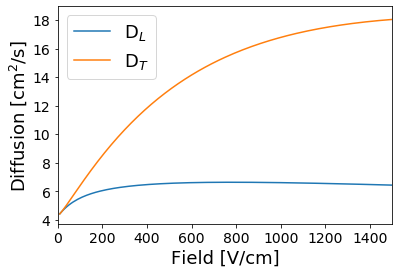

In [3]:
plt.plot(E_Field*1e3, LAr_DL_(E_Field), label=r"D$_L$")
plt.plot(E_Field*1e3, LAr_DT_(E_Field), label=r"D$_T$")
plt.legend(loc="upper left", fontsize=18)
plt.xlim(0,1500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(r"Diffusion [cm$^2$/s]", fontsize=18)
plt.xlabel(r"Field [V/cm]", fontsize=18)
# plt.semilogx()
# plt.axvline(0.5)
plt.show()



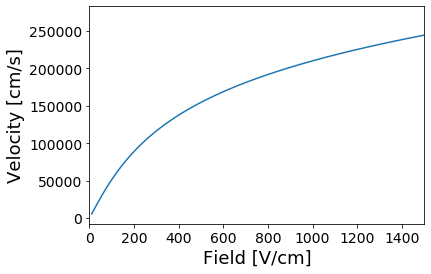

In [4]:
plt.plot(E_Field*1e3, LAr_vel_(E_Field))
plt.xlim(0,1500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(r"Velocity [cm/s]", fontsize=18)
plt.xlabel(r"Field [V/cm]", fontsize=18)
# plt.semilogx()
# plt.axvline(0.5)
plt.show()

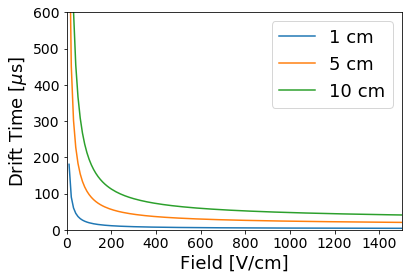

In [5]:
plt.plot(E_Field*1e3, TPC_DritTime_(E_Field, 1.0)*1e6, label='1 cm')
plt.plot(E_Field*1e3, TPC_DritTime_(E_Field, 5.0)*1e6, label='5 cm')
plt.plot(E_Field*1e3, TPC_DritTime_(E_Field, 10.0)*1e6, label='10 cm')
plt.legend(loc="upper right", fontsize=18)

plt.ylim(0,600)
plt.xlim(0,1500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(r"Drift Time [$\mu$s]", fontsize=18)
plt.xlabel(r"Field [V/cm]", fontsize=18)
# plt.semilogx()
# plt.axvline(0.5)
plt.show()

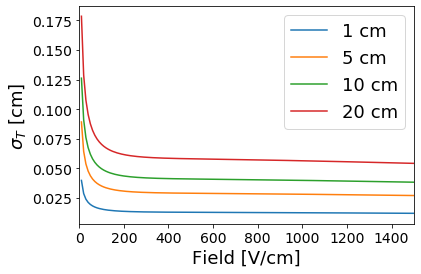

In [7]:
plt.plot(E_Field*1e3, LAr_SigmaT_(E_Field, 1.0), label='1 cm')
plt.plot(E_Field*1e3, LAr_SigmaT_(E_Field, 5.0), label='5 cm')
plt.plot(E_Field*1e3, LAr_SigmaT_(E_Field, 10.0), label='10 cm')
plt.plot(E_Field*1e3, LAr_SigmaT_(E_Field, 20.0), label='20 cm')
plt.legend(loc="upper right", fontsize=18)

# plt.ylim(0,600)
plt.xlim(0,1500)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(r"$\sigma_T$ [cm]", fontsize=18)
plt.xlabel(r"Field [V/cm]", fontsize=18)
# plt.semilogx()
# plt.axvline(0.5)
plt.show()

<BarContainer object of 14 artists>

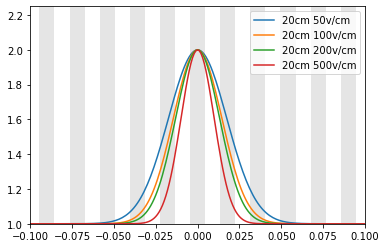

In [13]:
xval = np.arange(-5,5,0.001)
Dis = 20.0
gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(50, Dis))
plt.plot(xval, gg, label='20cm 50v/cm')

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(100, Dis))
plt.plot(xval, gg, label='20cm 100v/cm')

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(200, Dis))
plt.plot(xval, gg, label='20cm 200v/cm')

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(500, Dis))
plt.plot(xval, gg, label='20cm 500v/cm')

plt.xlim(-0.1,0.1)
plt.ylim(1,2.25)
plt.legend(loc="upper right")

# Create bars to mimic PCB spacing
x_pos = np.arange(-14,14,2)*0.009
height = np.ones(len(x_pos))*3
plt.bar(x_pos, height, width=0.009, color='k', alpha=0.1)

<BarContainer object of 14 artists>

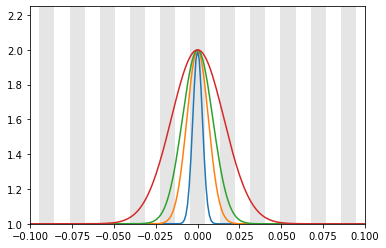

In [11]:
xval = np.arange(-5,5,0.001)
Dis = 30.0
gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(250, 1))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(250, 5))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(250, 10))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(250, 30))
plt.plot(xval, gg)

plt.xlim(-0.1,0.1)
plt.ylim(1,2.25)


# Create bars to mimic PCB spacing
x_pos = np.arange(-14,14,2)*0.009
height = np.ones(len(x_pos))*3
plt.bar(x_pos, height, width=0.009, color='k', alpha=0.1)

(-0.1, 0.1)

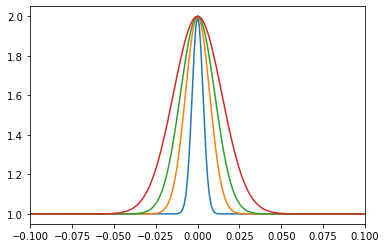

In [139]:
xval = np.arange(-5,5,0.001)
gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(100, 1.0))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(100, 5.0))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(100, 10.0))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(100, 20.0))
plt.plot(xval, gg)

plt.xlim(-0.1,0.1)

(-0.1, 0.1)

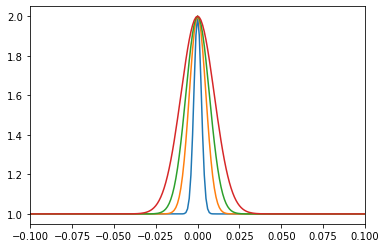

In [140]:
xval = np.arange(-5,5,0.001)
gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(500, 1.0))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(500, 5.0))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(500, 10.0))
plt.plot(xval, gg)

gg = gauss(xval, 1, 1, 0, LAr_SigmaT_(500, 20.0))
plt.plot(xval, gg)

plt.xlim(-0.1,0.1)